<a href="https://colab.research.google.com/github/safair/DataLit/blob/master/flight_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [3]:
#assign flights data frame (read directly fro location)
flights_df = pd.read_csv('https://github.com/WillKoehrsen/Data-Analysis/raw/master/univariate_dist/data/formatted_flights.csv', index_col=0)
flights_df.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


(array([  276.,   636.,  1394.,  2820.,  5339.,  9420., 15551., 23546.,
        31319., 34857., 33790., 29786., 24391., 19028., 14894., 11324.,
         8815.,  7159.,  5908.,  4896.,  4130.,  3630.,  3139.,  2782.,
         2455.,  2179.,  1973.,  1805.,  1646.,  1454.,  1360.,  1286.,
         1167.,  1013.,   945.,  1000.]),
 array([-60., -55., -50., -45., -40., -35., -30., -25., -20., -15., -10.,
         -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,
         50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.,
        105., 110., 115., 120.]),
 <a list of 36 Patch objects>)

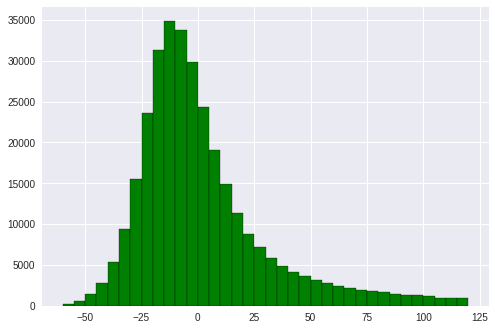

In [47]:
# matplot histogram
plt.hist(flights_df['arr_delay'], color = 'green', edgecolor = 'black',
         bins = int(180/5))


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Flights')

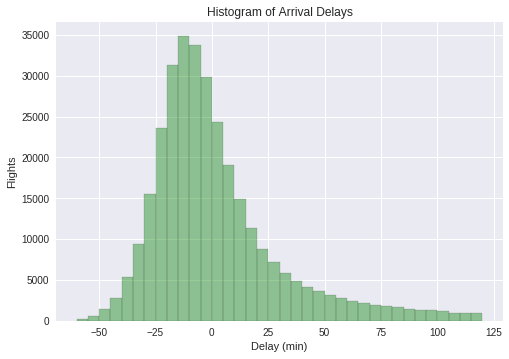

In [56]:
# seaborn histogram
sns.distplot(flights_df['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

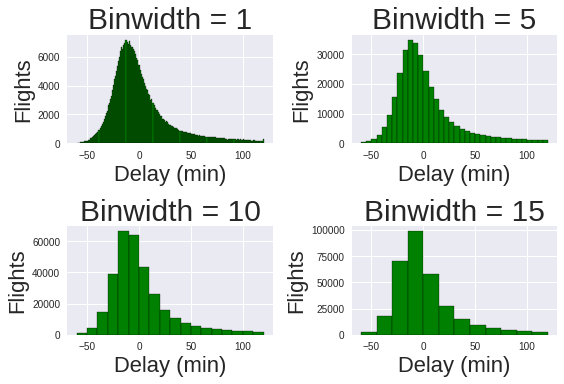

In [49]:
# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights_df['arr_delay'], bins = int(180/binwidth),
             color = 'green', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('Delay (min)', size = 22)
    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

In [7]:
# count of data rows (more is better)
flights_df.name.value_counts()

United Air Lines Inc.          56359
JetBlue Airways                52267
ExpressJet Airlines Inc.       48641
Delta Air Lines Inc.           46468
American Airlines Inc.         31197
Envoy Air                      24327
US Airways Inc.                19547
Endeavor Air Inc.              16578
Southwest Airlines Co.         11588
Virgin America                  4920
AirTran Airways Corporation     3021
Alaska Airlines Inc.             689
Frontier Airlines Inc.           639
Mesa Airlines Inc.               513
Hawaiian Airlines Inc.           332
SkyWest Airlines Inc.             27
Name: name, dtype: int64

In [8]:
# determine on time & early flights
on_time = flights_df.loc[flights_df['arr_delay'] <= 0]
early_and_on_time = on_time['name'].value_counts()
total_no_of_arrivals = flights_df['name'].value_counts()
prob_on_time = early_and_on_time/total_no_of_arrivals
prob_on_time.sort_values(ascending=False)


Alaska Airlines Inc.           0.741655
Hawaiian Airlines Inc.         0.722892
SkyWest Airlines Inc.          0.703704
Virgin America                 0.680691
American Airlines Inc.         0.680162
Delta Air Lines Inc.           0.671365
Endeavor Air Inc.              0.642418
US Airways Inc.                0.638410
United Air Lines Inc.          0.629891
JetBlue Airways                0.581992
Southwest Airlines Co.         0.581636
Mesa Airlines Inc.             0.557505
Envoy Air                      0.548526
ExpressJet Airlines Inc.       0.547295
Frontier Airlines Inc.         0.452269
AirTran Airways Corporation    0.423701
Name: name, dtype: float64

# Conclusion

Alaska Airlines has a 74% chance of being on time or early and Hawaiian Airlines has a 72% chance of on time or early arrival which are higher than the other airlines.  So if traveling to Alaska, choose Alaska Airlines over other carriers.  If traveling to Hawaii, choose Hawaiian Airlines over other prividers.  American Airlines and Delta are also good choices.  There is a lot of data and they have a 68% amd 67% chance (respectively) of arriving early or on time.  
# TL;DR
- Alaska Airlines when travelling to Alaska
- Hawaiian Airlines for Hawaii
- American and Delta everywhere else

#Part 2
Use the same airline data to demonstrate (or disprove) the four aspects of the Central Limit Theorem (from Central Limit Theorem video).  There are 317,113 observations.

1.  The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.

2.  The sampling distribution will be well-modeled by a normal distribution 

3.  The spread of the sampling distribution is related to the spread of the population values.

4.  Bigger samples lead to a smaller spread in the sampling distribution.

In [21]:
flights_df['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

In [58]:
# get population mean - There are 317,113 observations.
print('Population mean: ' + str(flights_df.arr_delay.mean()))
print('Population std: ' + str(flights_df.arr_delay.std()))


Population mean: 1.2971432896160044
Population std: 29.064401023259187


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


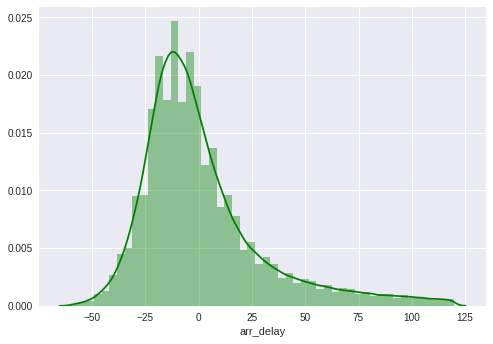

In [59]:
sns.distplot(flights_df['arr_delay'], color='green')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


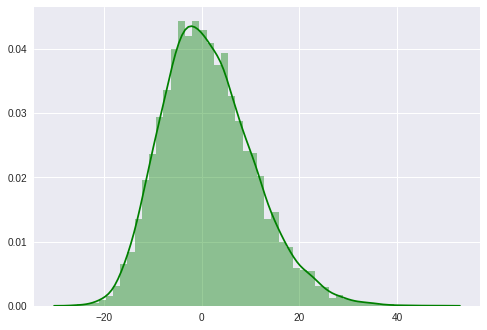

In [89]:
# sample size = 10
sample_size = 10
means = []
stds = []

for i in range(10000):  # run 10000 times
  sample = flights_df.arr_delay.sample(sample_size, random_state=i)
  means.append(sample.mean())
  stds.append(sample.std())  
  
sns.distplot(means,kde=True, color='green')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


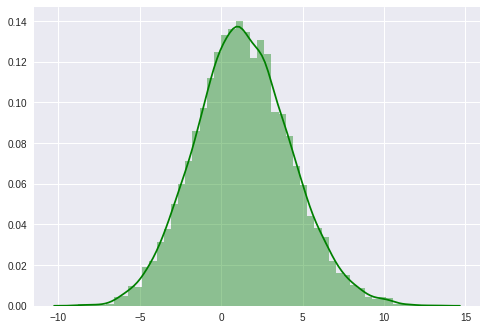

In [90]:
# sample size = 100
sample_size = 100
means = []
stds = []

for i in range(10000):  # run 10000 times
  sample = flights_df.arr_delay.sample(sample_size, random_state=i)
  means.append(sample.mean())
  stds.append(sample.std())  
  
sns.distplot(means,kde=True, color='green')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


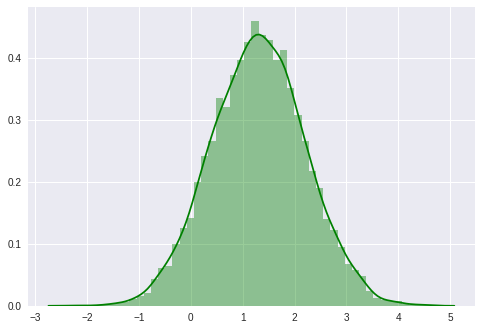

In [88]:
# sample size = 1000
sample_size = 1000
means = []
stds = []

for i in range(10000):  # run 10000 times
  sample = flights_df.arr_delay.sample(sample_size, random_state=i)
  means.append(sample.mean())
  stds.append(sample.std())  
  
sns.distplot(means,kde=True, color='green')

In [85]:
print("Sample means: ",np.mean(means))
print("Entire population mean: ",flights_df.arr_delay.mean())
print("Means are approximately equal")

Sample means:  1.3032489
Entire population mean:  1.2971432896160044
Means are approximately equal


# Conclusion

- Use the same airline data to demonstrate (or disprove) the four aspects of the Central Limit Theorem


1.   The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn. - TRUE
2.   The sampling distribution will be well-modeled by a normal distribution - TRUE
3.   The spread of the sampling distribution is related to the spread of the population values. - TRUE
4.   Bigger samples lead to a smaller spread in the sampling distribution. - TRUE


- Take repeated random samples of a specific size and measure the mean and standard deviation of each one.

> Sample size: 1000, run 10,000 times

- Graph your results. Does it look like a normal distribution?

> Yes

- How does sample size affect your results?

> Spread decreases with increased sample size 